In [1]:
# Load the "autoreload" extension
%load_ext autoreload

# always reload modules marked with "%aimport"
%autoreload 1

import os
import sys

# add the 'src' directory as one where we can import modules
src_dir = os.path.join(os.getcwd(), os.pardir, 'src', 'data')
sys.path.append(src_dir)

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics

In [3]:
%aimport scrape_buda

In [4]:
interim_dir = os.path.join(os.getcwd(), os.pardir, 'data', 'interim')

In [165]:
from scrape_buda import BudaRating

In [ ]:
ratings = scrape_buda.BudaRating()
prefix = os.path.join(interim_dir, 'data20160521')
ratings.load_buda(prefix)

In [ ]:
ratings.predicted_rating()

 19%|█▉        | 588/3031 [00:00<00:01, 1899.28it/s]

Lavallière, Martin
Lavallière, Martin
Lavallière, Martin


 24%|██▎       | 719/3031 [00:04<00:25, 91.40it/s]  

> /Users/rbussman/Projects/BUDA/buda-ratings/src/data/scrape_buda.py(419)predict_team()
-> for player in players:


In [97]:
ratings.allteams.to_csv(os.path.join(interim_dir, 'withself_ratings.csv'))

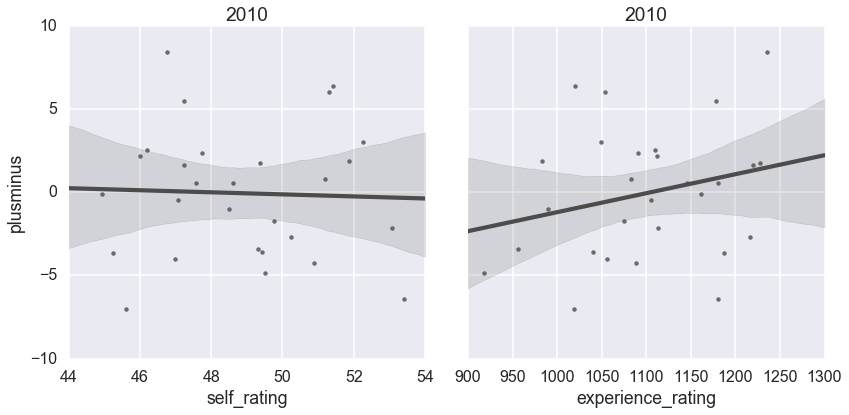

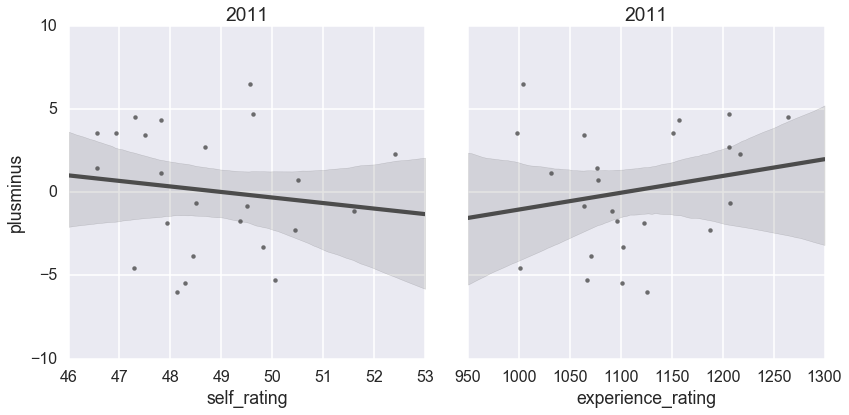

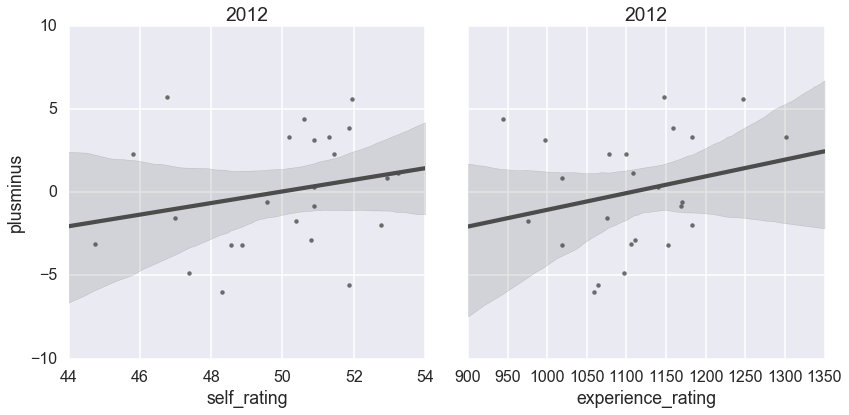

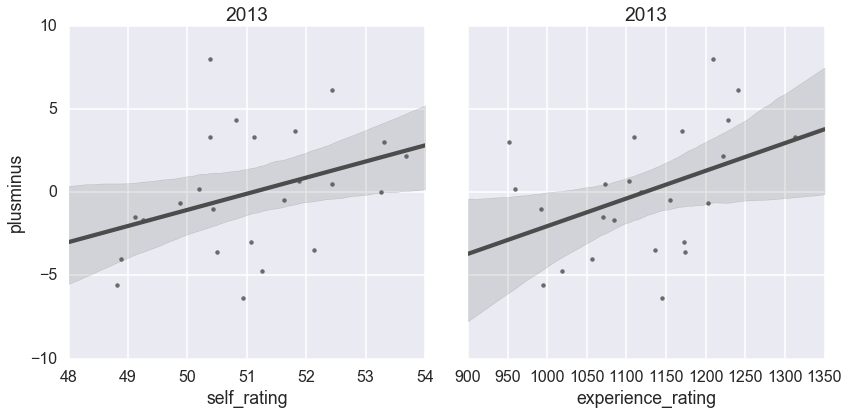

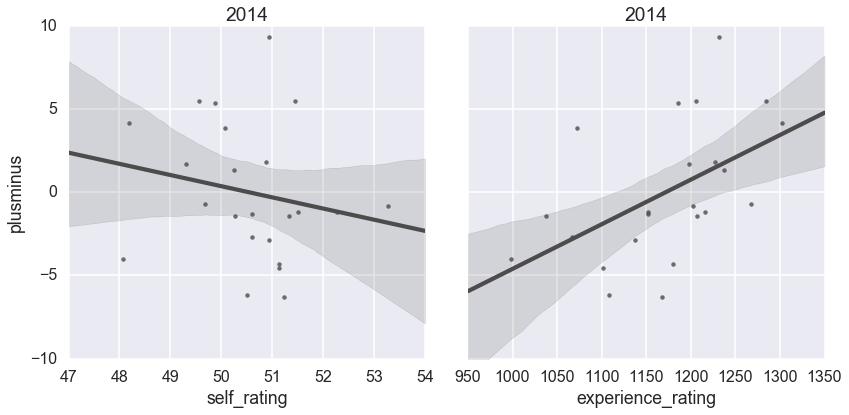

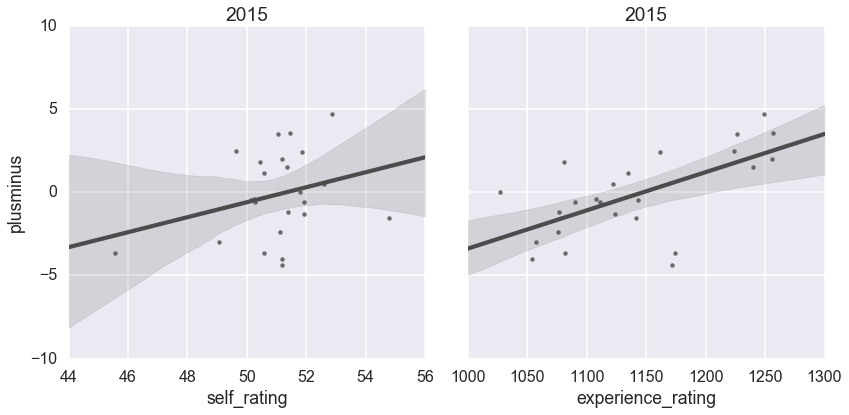

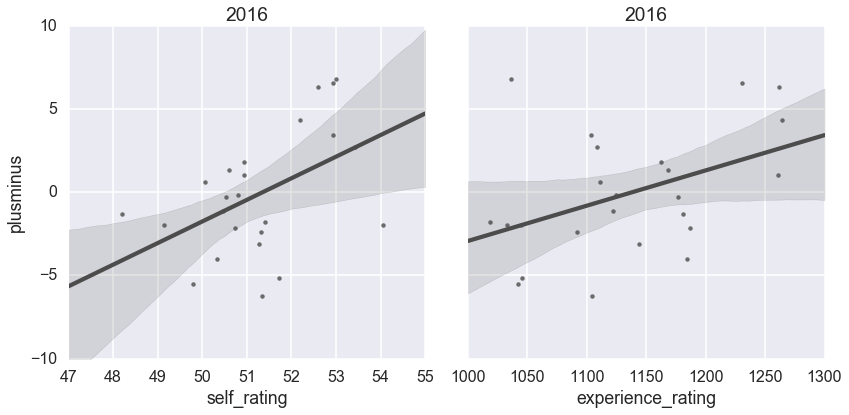

In [81]:
for year in range(2010, 2017):
    index = (ratings.allteams['year'] == year) & \
        (ratings.allteams['type'] == 'Hat') & \
        (ratings.allteams['season'] == 'Spring') & \
        (ratings.allteams['divname'] == 'JP Mixed (4/3)')
    okdf = ratings.allteams[index]
    g = sns.PairGrid(okdf, y_vars=["plusminus"], x_vars=["self_rating", "experience_rating"], size=6)
    g.map(sns.regplot, color=".3")
#     plt.title(year)
    g.set(ylim=(-10, 10), title=year)

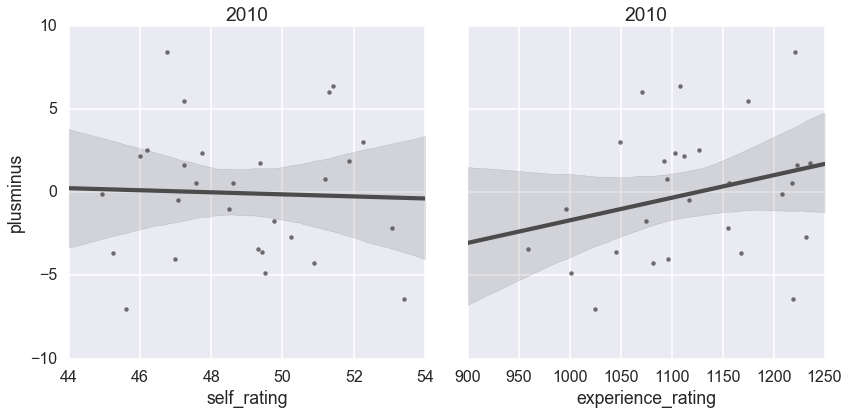

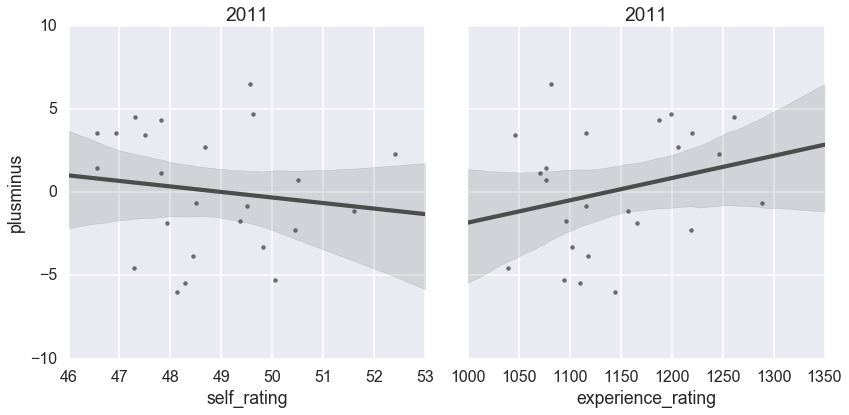

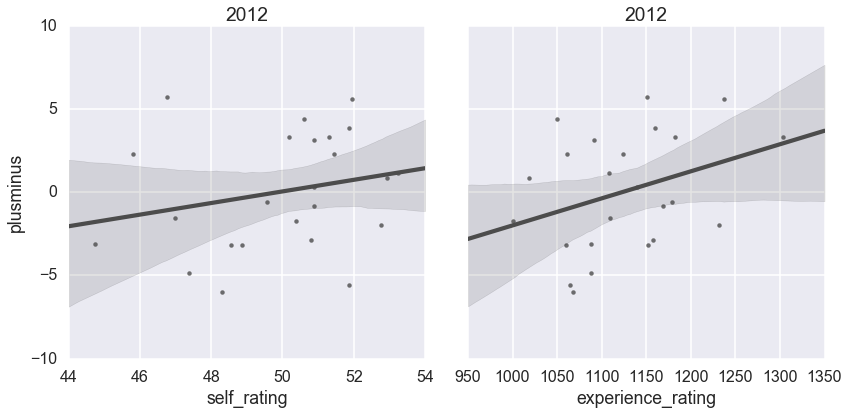

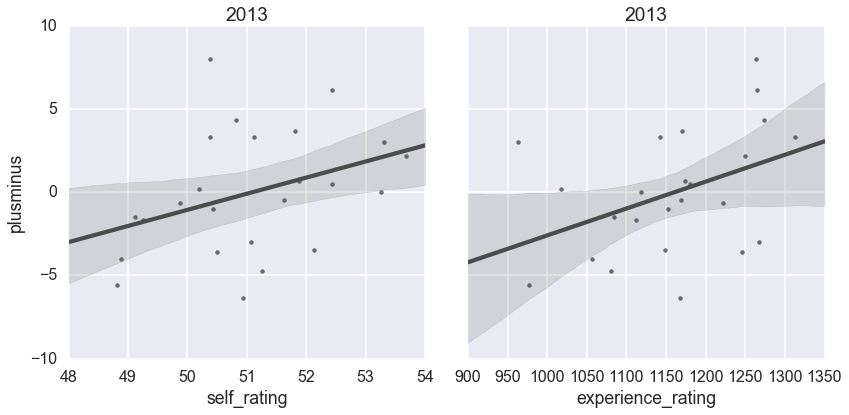

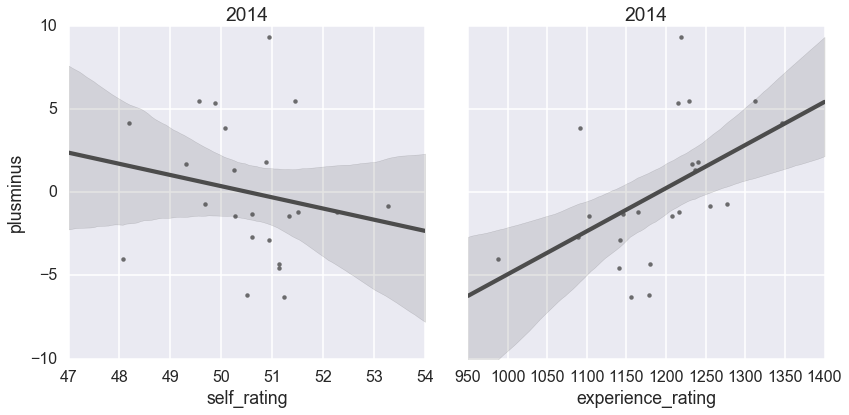

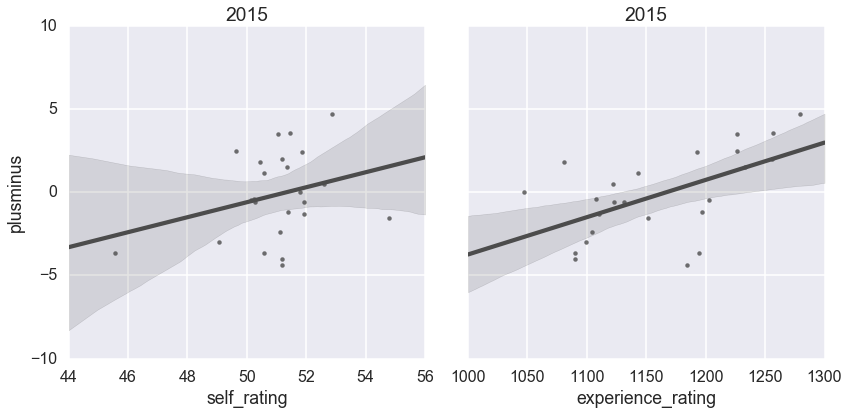

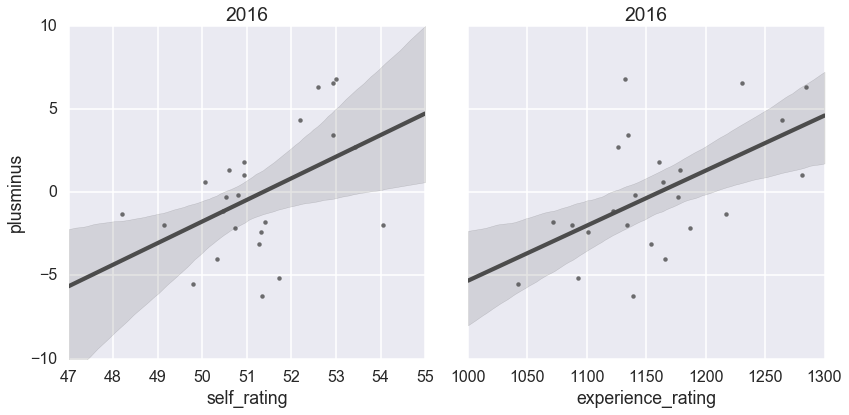

In [98]:
for year in range(2010, 2017):
    index = (ratings.allteams['year'] == year) & \
        (ratings.allteams['type'] == 'Hat') & \
        (ratings.allteams['season'] == 'Spring') & \
        (ratings.allteams['divname'] == 'JP Mixed (4/3)')
    okdf = ratings.allteams[index]
    g = sns.PairGrid(okdf, y_vars=["plusminus"], x_vars=["self_rating", "experience_rating"], size=6)
    g.map(sns.regplot, color=".3")
#     plt.title(year)
    g.set(ylim=(-10, 10), title=year)

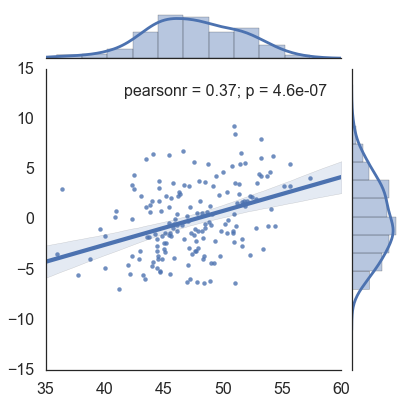

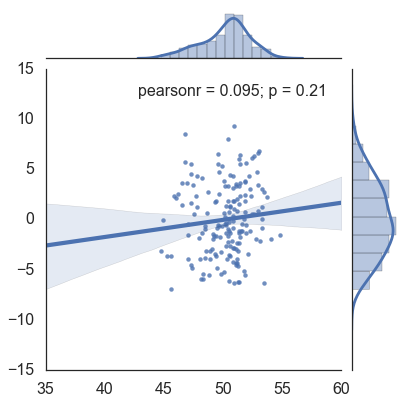

In [134]:
sns.set_context('poster')
sns.set_style('white')
# for year in range(2010, 2016):
index = (ratings.allteams['year'] < 2017) & (ratings.allteams['year'] >= 2010) & \
    (ratings.allteams['type'] == 'Hat') & \
    (ratings.allteams['season'] == 'Spring') & \
    (ratings.allteams['divname'] == 'JP Mixed (4/3)')
sph = ratings.allteams[index]

zscale = scrape_buda.experience_to_self(sph['experience_rating'].values)
sns.jointplot(zscale, sph['plusminus'].values, kind='reg', xlim=[35,60])
# f, ax = plt.subplots()
g = sns.jointplot(sph['self_rating'].values, sph['plusminus'].values, kind='reg', xlim=[35,60])
# ax.set_xlim([30, 60])
#     plt.plot(zscale, sph['plusminus'], '.', color='salmon')
#     plt.plot(sph['self_rating'], sph['plusminus'], '.', color='cyan')
#     zscale = (sph['experience_rating'] - sph['experience_rating'].mean()) / sph['experience_rating'].std()
#     plt.plot(zscale, sph['plusminus'], '.')

In [135]:
index = (ratings.allteams['year'] < 2017) & (ratings.allteams['year'] >= 2010) & \
    (ratings.allteams['type'] == 'Hat') & \
    (ratings.allteams['season'] == 'Spring') & \
    (ratings.allteams['divname'] == 'JP Mixed (4/3)')
sph = ratings.allteams[index]

In [137]:
sphindex = (sph['experience_rating'] < 1000) & (sph['plusminus'] > 0)
sph[sphindex]

,Unnamed: 0,divname,divrating,plusminus,season,teamid,teamname,type,year,self_rating,captain_rating,experience_rating
789,789,JP Mixed (4/3),0.0,3.0,Spring,34600,Members Zonely (14),Hat,2013,53.3125,NaN,963.538837


In [147]:
outlier = ratings.allteams[ratings.allteams['teamid'] == 34600]

In [155]:
outlier[['self_rating', 'experience_rating']].values

array([[ 0     45.0
1     17.0
2     39.0
3     40.0
4     75.0
5     37.0
6     49.0
7     51.0
8     54.0
9     56.0
10    70.0
11    52.0
12    64.0
13    59.0
14    80.0
15    65.0
Name: self_rating, dtype: float64,
        0     795.694
1         800
2       990.0
3     1445.71
4     1277.21
5         872
6        1095
7         405
8     1214.29
9     684.187
10        405
11        405
12    1289.54
13    1786.64
14    1151.35
15        800
Name: experience_rating, dtype: object]], dtype=object)

In [158]:
ratings.team_detail('34600')

,club_rating,hat_rating,nclub,nhat,player
0,874.433333,118.335714,5,10,"Antoshko, Oleksiy"
1,800.000000,-112.047619,0,6,"Banerdt, Rhiannon"
2,800.000000,0.000000,0,0,"BOnney, Devon"
3,1445.714286,0.000000,1,0,"Boyle, Kathleen"
4,1277.211538,0.000000,2,0,"Burns, D.Claire"
5,872.000000,-12.228571,2,5,"Consul, Matt"
6,1095.000000,0.000000,2,0,"Greppi, Chloe"
7,800.000000,131.119963,0,26,"McDiarmid, Jeremy"
8,1214.285714,-26.700000,1,5,"Mulroy, Kathleen"
9,796.090909,22.596939,5,14,"Murphy, Matt"
